In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install flair==0.12.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 39.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1

In [ ]:
!pip install transformers==4.30.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 102.3 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.0
    Uninstalling tokenizers-0.15.0:
      Successfully uninstalled tokenizers-0.15.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


In [ ]:
from flair.data import Corpus
from flair.datasets import ColumnCorpus
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings, FlairEmbeddings, FastTextEmbeddings
from typing import List

In [ ]:
# French corpus of 127 texts from ECHR (automatic and official translations) with projected annotations (reviewed and non-reviewed)

columns = {0:'text', 1:'ner'}

corpus_folder = '/content/drive/MyDrive/.../'
corpus : Corpus = ColumnCorpus(corpus_folder, columns,
                                    train_file='FR-all-train.tsv', column_delimiter=' ',
                                    dev_file='FR-all-dev.tsv',
                                    test_file='FR-all-test.tsv'
)

# obtain and print corpus statistics
stats = corpus.obtain_statistics()
print(stats)

2024-01-22 16:09:51,697 Reading data from /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler
2024-01-22 16:09:51,698 Train: /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/FR-all-train.tsv
2024-01-22 16:09:51,699 Dev: /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/FR-all-dev.tsv
2024-01-22 16:09:51,700 Test: /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/FR-all-test.tsv
{
    "TRAIN": {
        "dataset": "TRAIN",
        "total_number_of_documents": 3881,
        "number_of_documents_per_class": {
            "CODE": 201,
            "DEM": 161,
            "PER": 752,
            "DATETIME": 1928,
            "LOC": 350,
            "MISC": 180,
            "ORG": 476,
            "QUANTITY": 108
        },
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 113780,
            "min": 1,
            "max": 508,
            "avg": 29.317186292192734
        }
    },
    "TEST": {
        "dataset

In [ ]:
# initialize sequence tagger
from flair.models import SequenceTagger

tagger = SequenceTagger.load("flair/ner-french")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/1.30G [00:00<?, ?B/s]

2024-01-22 16:11:10,488 SequenceTagger predicts: Dictionary with 19 tags: O, S-LOC, B-LOC, E-LOC, I-LOC, S-PER, B-PER, E-PER, I-PER, S-MISC, B-MISC, E-MISC, I-MISC, S-ORG, B-ORG, E-ORG, I-ORG, <START>, <STOP>


In [ ]:
# 2. what tag do we want to predict?
tag_type = 'ner'

# 3. make the tag dictionary from the corpus
new_tag_dictionary = corpus.make_label_dictionary(label_type=tag_type)
print(new_tag_dictionary.idx2item)

2024-01-22 16:11:10,729 Computing label dictionary. Progress:


3881it [00:00, 37968.08it/s]

2024-01-22 16:11:10,840 Dictionary created for label 'ner' with 9 values: DATETIME (seen 1928 times), PER (seen 752 times), ORG (seen 476 times), LOC (seen 350 times), CODE (seen 201 times), MISC (seen 180 times), DEM (seen 161 times), QUANTITY (seen 108 times)
[b'<unk>', b'DATETIME', b'PER', b'ORG', b'LOC', b'CODE', b'MISC', b'DEM', b'QUANTITY']


In [ ]:
print(tagger.label_dictionary.idx2item)

[b'O', b'S-LOC', b'B-LOC', b'E-LOC', b'I-LOC', b'S-PER', b'B-PER', b'E-PER', b'I-PER', b'S-MISC', b'B-MISC', b'E-MISC', b'I-MISC', b'S-ORG', b'B-ORG', b'E-ORG', b'I-ORG', b'<START>', b'<STOP>']


In [ ]:
new_tagger = SequenceTagger(tagger.embeddings, new_tag_dictionary, tag_type=tag_type)

2024-01-22 16:11:10,858 SequenceTagger predicts: Dictionary with 33 tags: O, S-DATETIME, B-DATETIME, E-DATETIME, I-DATETIME, S-PER, B-PER, E-PER, I-PER, S-ORG, B-ORG, E-ORG, I-ORG, S-LOC, B-LOC, E-LOC, I-LOC, S-CODE, B-CODE, E-CODE, I-CODE, S-MISC, B-MISC, E-MISC, I-MISC, S-DEM, B-DEM, E-DEM, I-DEM, S-QUANTITY, B-QUANTITY, E-QUANTITY, I-QUANTITY


In [ ]:
# initialize trainer
from flair.trainers import ModelTrainer
trainer = ModelTrainer(new_tagger, corpus)

In [ ]:
# train # train_with_dev=True
trainer.train('/content/drive/MyDrive/...',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=20,
              write_weights=True)
# saving the model into your drive (need to provide the full path of the folder in which you want to save the model)

2024-01-22 16:11:11,532 ----------------------------------------------------------------------------------------------------
2024-01-22 16:11:11,534 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      '0-/vol/home-vol2/ml/akbikala/.flair/embeddings/fr-wiki-fasttext-300d-1M'
      (embedding): Embedding(1000000, 300)
    )
    (list_embedding_1): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.5, inplace=False)
        (encoder): Embedding(275, 100)
        (rnn): LSTM(100, 1024)
      )
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.5, inplace=False)
        (encoder): Embedding(275, 100)
        (rnn): LSTM(100, 1024)
      )
    )
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=2348, out_features=2348, bias=True)
  (rnn): LSTM(2348, 256, batch_first=True, bidirectional=True)
  (linea

100%|██████████| 16/16 [00:05<00:00,  3.13it/s]

2024-01-22 16:11:55,047 Evaluating as a multi-label problem: False
2024-01-22 16:11:55,068 DEV : loss 0.19356974959373474 - f1-score (micro avg)  0.5484
2024-01-22 16:11:55,118 BAD EPOCHS (no improvement): 0
2024-01-22 16:11:55,124 saving best model


2024-01-22 16:11:58,823 ----------------------------------------------------------------------------------------------------
2024-01-22 16:12:00,835 epoch 2 - iter 12/122 - loss 0.21228403 - time (sec): 2.01 - samples/sec: 5605.45 - lr: 0.100000
2024-01-22 16:12:04,349 epoch 2 - iter 24/122 - loss 0.22041970 - time (sec): 5.53 - samples/sec: 4220.66 - lr: 0.100000
2024-01-22 16:12:07,650 epoch 2 - iter 36/122 - loss 0.22088273 - time (sec): 8.83 - samples/sec: 3942.83 - lr: 0.100000
2024-01-22 16:12:10,722 epoch 2 - iter 48/122 - loss 0.22698335 - time (sec): 11.90 - samples/sec: 3879.85 - lr: 0.100000
2024-01-22 16:12:13,397 epoch 2 - iter 60/122 - loss 0.22250930 - time (sec): 14.57 - samples/sec: 3877.23 - lr: 0.100000
2024-01-22 16:12:16,217 epoch 2 - iter 72/122 - loss 0.21718985 - time (sec): 17.39 - samples/sec: 3856.26 - lr: 0.100000
2024-01-22 16:12:19,083 epoch 2 - iter 84/122 - loss 0.21598184 - time (sec): 20.26 - samples/sec: 3861.12 - lr: 0.100000
2024-01-22 16:12:22,012 

100%|██████████| 16/16 [00:04<00:00,  3.76it/s]

2024-01-22 16:12:33,650 Evaluating as a multi-label problem: False
2024-01-22 16:12:33,666 DEV : loss 0.12065155804157257 - f1-score (micro avg)  0.7377
2024-01-22 16:12:33,729 BAD EPOCHS (no improvement): 0
2024-01-22 16:12:33,734 saving best model


2024-01-22 16:12:37,670 ----------------------------------------------------------------------------------------------------
2024-01-22 16:12:39,517 epoch 3 - iter 12/122 - loss 0.19291504 - time (sec): 1.84 - samples/sec: 6031.75 - lr: 0.100000
2024-01-22 16:12:43,656 epoch 3 - iter 24/122 - loss 0.23748698 - time (sec): 5.98 - samples/sec: 3881.64 - lr: 0.100000
2024-01-22 16:12:46,585 epoch 3 - iter 36/122 - loss 0.22764985 - time (sec): 8.91 - samples/sec: 3867.14 - lr: 0.100000
2024-01-22 16:12:49,423 epoch 3 - iter 48/122 - loss 0.20765275 - time (sec): 11.75 - samples/sec: 3842.29 - lr: 0.100000
2024-01-22 16:12:52,425 epoch 3 - iter 60/122 - loss 0.19539930 - time (sec): 14.75 - samples/sec: 3800.55 - lr: 0.100000
2024-01-22 16:12:55,250 epoch 3 - iter 72/122 - loss 0.18815329 - time (sec): 17.58 - samples/sec: 3820.90 - lr: 0.100000
2024-01-22 16:12:58,036 epoch 3 - iter 84/122 - loss 0.18333282 - time (sec): 20.36 - samples/sec: 3859.42 - lr: 0.100000
2024-01-22 16:13:01,179 

100%|██████████| 16/16 [00:04<00:00,  3.68it/s]

2024-01-22 16:13:12,182 Evaluating as a multi-label problem: False
2024-01-22 16:13:12,197 DEV : loss 0.09695759415626526 - f1-score (micro avg)  0.7732
2024-01-22 16:13:12,248 BAD EPOCHS (no improvement): 0
2024-01-22 16:13:12,253 saving best model


2024-01-22 16:13:16,634 ----------------------------------------------------------------------------------------------------
2024-01-22 16:13:18,719 epoch 4 - iter 12/122 - loss 0.13868518 - time (sec): 2.08 - samples/sec: 5268.71 - lr: 0.100000
2024-01-22 16:13:22,863 epoch 4 - iter 24/122 - loss 0.14578860 - time (sec): 6.23 - samples/sec: 3592.40 - lr: 0.100000
2024-01-22 16:13:26,075 epoch 4 - iter 36/122 - loss 0.13524554 - time (sec): 9.44 - samples/sec: 3529.56 - lr: 0.100000
2024-01-22 16:13:28,721 epoch 4 - iter 48/122 - loss 0.13962886 - time (sec): 12.09 - samples/sec: 3686.33 - lr: 0.100000
2024-01-22 16:13:31,750 epoch 4 - iter 60/122 - loss 0.13903049 - time (sec): 15.11 - samples/sec: 3709.13 - lr: 0.100000
2024-01-22 16:13:34,617 epoch 4 - iter 72/122 - loss 0.14345918 - time (sec): 17.98 - samples/sec: 3730.06 - lr: 0.100000
2024-01-22 16:13:37,533 epoch 4 - iter 84/122 - loss 0.14044477 - time (sec): 20.90 - samples/sec: 3748.57 - lr: 0.100000
2024-01-22 16:13:40,384 

100%|██████████| 16/16 [00:04<00:00,  3.62it/s]

2024-01-22 16:13:52,200 Evaluating as a multi-label problem: False
2024-01-22 16:13:52,215 DEV : loss 0.0930996686220169 - f1-score (micro avg)  0.7625
2024-01-22 16:13:52,266 BAD EPOCHS (no improvement): 1
2024-01-22 16:13:52,272 ----------------------------------------------------------------------------------------------------


2024-01-22 16:13:54,063 epoch 5 - iter 12/122 - loss 0.13457610 - time (sec): 1.79 - samples/sec: 6407.12 - lr: 0.100000
2024-01-22 16:13:56,797 epoch 5 - iter 24/122 - loss 0.11911473 - time (sec): 4.52 - samples/sec: 4951.91 - lr: 0.100000
2024-01-22 16:13:59,585 epoch 5 - iter 36/122 - loss 0.12223155 - time (sec): 7.31 - samples/sec: 4561.03 - lr: 0.100000
2024-01-22 16:14:02,417 epoch 5 - iter 48/122 - loss 0.12936802 - time (sec): 10.14 - samples/sec: 4414.10 - lr: 0.100000
2024-01-22 16:14:05,138 epoch 5 - iter 60/122 - loss 0.12797217 - time (sec): 12.86 - samples/sec: 4413.79 - lr: 0.100000
2024-01-22 16:14:07,916 epoch 5 - iter 72/122 - loss 0.12802448 - time (sec): 15.64 - samples/sec: 4332.36 - lr: 0.100000
2024-01-22 16:14:11,222 epoch 5 - iter 84/122 - loss 0.14065560 - time (sec): 18.95 - samples/sec: 4183.17 - lr: 0.100000
2024-01-22 16:14:14,040 epoch 5 - iter 96/122 - loss 0.13948334 - time (sec): 21.77 - samples/sec: 4141.43 - lr: 0.100000
2024-01-22 16:14:16,747 epo

100%|██████████| 16/16 [00:04<00:00,  3.88it/s]

2024-01-22 16:14:24,912 Evaluating as a multi-label problem: False
2024-01-22 16:14:24,928 DEV : loss 0.09741029143333435 - f1-score (micro avg)  0.7488
2024-01-22 16:14:24,989 BAD EPOCHS (no improvement): 2
2024-01-22 16:14:24,994 ----------------------------------------------------------------------------------------------------


2024-01-22 16:14:27,556 epoch 6 - iter 12/122 - loss 0.09962934 - time (sec): 2.56 - samples/sec: 4451.78 - lr: 0.100000
2024-01-22 16:14:30,371 epoch 6 - iter 24/122 - loss 0.11974784 - time (sec): 5.38 - samples/sec: 4283.83 - lr: 0.100000
2024-01-22 16:14:33,138 epoch 6 - iter 36/122 - loss 0.12003134 - time (sec): 8.14 - samples/sec: 4174.54 - lr: 0.100000
2024-01-22 16:14:35,750 epoch 6 - iter 48/122 - loss 0.11572205 - time (sec): 10.75 - samples/sec: 4171.51 - lr: 0.100000
2024-01-22 16:14:38,425 epoch 6 - iter 60/122 - loss 0.11481153 - time (sec): 13.43 - samples/sec: 4163.41 - lr: 0.100000
2024-01-22 16:14:41,254 epoch 6 - iter 72/122 - loss 0.11456077 - time (sec): 16.26 - samples/sec: 4116.29 - lr: 0.100000
2024-01-22 16:14:44,036 epoch 6 - iter 84/122 - loss 0.11231490 - time (sec): 19.04 - samples/sec: 4069.63 - lr: 0.100000
2024-01-22 16:14:46,889 epoch 6 - iter 96/122 - loss 0.11449693 - time (sec): 21.89 - samples/sec: 4063.77 - lr: 0.100000
2024-01-22 16:14:50,145 epo

100%|██████████| 16/16 [00:04<00:00,  3.77it/s]

2024-01-22 16:14:58,037 Evaluating as a multi-label problem: False
2024-01-22 16:14:58,053 DEV : loss 0.22430366277694702 - f1-score (micro avg)  0.6336
2024-01-22 16:14:58,115 BAD EPOCHS (no improvement): 3
2024-01-22 16:14:58,120 ----------------------------------------------------------------------------------------------------


2024-01-22 16:15:00,585 epoch 7 - iter 12/122 - loss 0.15034058 - time (sec): 2.46 - samples/sec: 4821.17 - lr: 0.100000
2024-01-22 16:15:03,373 epoch 7 - iter 24/122 - loss 0.12431586 - time (sec): 5.25 - samples/sec: 4308.19 - lr: 0.100000
2024-01-22 16:15:05,897 epoch 7 - iter 36/122 - loss 0.11982303 - time (sec): 7.78 - samples/sec: 4302.90 - lr: 0.100000
2024-01-22 16:15:08,776 epoch 7 - iter 48/122 - loss 0.11559907 - time (sec): 10.65 - samples/sec: 4194.80 - lr: 0.100000
2024-01-22 16:15:11,437 epoch 7 - iter 60/122 - loss 0.11114074 - time (sec): 13.32 - samples/sec: 4185.07 - lr: 0.100000
2024-01-22 16:15:14,308 epoch 7 - iter 72/122 - loss 0.11238905 - time (sec): 16.19 - samples/sec: 4153.99 - lr: 0.100000
2024-01-22 16:15:17,047 epoch 7 - iter 84/122 - loss 0.10920718 - time (sec): 18.93 - samples/sec: 4169.86 - lr: 0.100000
2024-01-22 16:15:19,741 epoch 7 - iter 96/122 - loss 0.10987429 - time (sec): 21.62 - samples/sec: 4156.99 - lr: 0.100000
2024-01-22 16:15:22,391 epo

100%|██████████| 16/16 [00:04<00:00,  3.75it/s]

2024-01-22 16:15:30,482 Evaluating as a multi-label problem: False
2024-01-22 16:15:30,497 DEV : loss 0.07646104693412781 - f1-score (micro avg)  0.761
2024-01-22 16:15:30,549 Epoch     7: reducing learning rate of group 0 to 5.0000e-02.
2024-01-22 16:15:30,550 BAD EPOCHS (no improvement): 4
2024-01-22 16:15:30,555 ----------------------------------------------------------------------------------------------------


2024-01-22 16:15:32,935 epoch 8 - iter 12/122 - loss 0.08476993 - time (sec): 2.38 - samples/sec: 4655.53 - lr: 0.050000
2024-01-22 16:15:35,672 epoch 8 - iter 24/122 - loss 0.08494993 - time (sec): 5.12 - samples/sec: 4310.81 - lr: 0.050000
2024-01-22 16:15:38,265 epoch 8 - iter 36/122 - loss 0.08583127 - time (sec): 7.71 - samples/sec: 4280.54 - lr: 0.050000
2024-01-22 16:15:41,569 epoch 8 - iter 48/122 - loss 0.10062404 - time (sec): 11.01 - samples/sec: 4074.75 - lr: 0.050000
2024-01-22 16:15:44,292 epoch 8 - iter 60/122 - loss 0.09774690 - time (sec): 13.74 - samples/sec: 4111.35 - lr: 0.050000
2024-01-22 16:15:47,021 epoch 8 - iter 72/122 - loss 0.09710982 - time (sec): 16.46 - samples/sec: 4123.55 - lr: 0.050000
2024-01-22 16:15:49,580 epoch 8 - iter 84/122 - loss 0.09837780 - time (sec): 19.02 - samples/sec: 4133.25 - lr: 0.050000
2024-01-22 16:15:52,244 epoch 8 - iter 96/122 - loss 0.09622250 - time (sec): 21.69 - samples/sec: 4157.50 - lr: 0.050000
2024-01-22 16:15:54,963 epo

100%|██████████| 16/16 [00:04<00:00,  3.90it/s]

2024-01-22 16:16:02,933 Evaluating as a multi-label problem: False
2024-01-22 16:16:02,951 DEV : loss 0.06738229840993881 - f1-score (micro avg)  0.8164
2024-01-22 16:16:03,001 BAD EPOCHS (no improvement): 0
2024-01-22 16:16:03,006 saving best model


2024-01-22 16:16:06,778 ----------------------------------------------------------------------------------------------------
2024-01-22 16:16:08,670 epoch 9 - iter 12/122 - loss 0.07564389 - time (sec): 1.89 - samples/sec: 5717.09 - lr: 0.050000
2024-01-22 16:16:12,251 epoch 9 - iter 24/122 - loss 0.07918119 - time (sec): 5.47 - samples/sec: 4134.90 - lr: 0.050000
2024-01-22 16:16:15,025 epoch 9 - iter 36/122 - loss 0.08550345 - time (sec): 8.25 - samples/sec: 4123.05 - lr: 0.050000
2024-01-22 16:16:17,587 epoch 9 - iter 48/122 - loss 0.08264022 - time (sec): 10.81 - samples/sec: 4163.27 - lr: 0.050000
2024-01-22 16:16:20,395 epoch 9 - iter 60/122 - loss 0.08282589 - time (sec): 13.62 - samples/sec: 4145.56 - lr: 0.050000
2024-01-22 16:16:23,469 epoch 9 - iter 72/122 - loss 0.08124564 - time (sec): 16.69 - samples/sec: 4071.36 - lr: 0.050000
2024-01-22 16:16:26,269 epoch 9 - iter 84/122 - loss 0.08257115 - time (sec): 19.49 - samples/sec: 4051.95 - lr: 0.050000
2024-01-22 16:16:29,906 

100%|██████████| 16/16 [00:04<00:00,  3.66it/s]

2024-01-22 16:16:41,017 Evaluating as a multi-label problem: False
2024-01-22 16:16:41,033 DEV : loss 0.06548827886581421 - f1-score (micro avg)  0.7853
2024-01-22 16:16:41,095 BAD EPOCHS (no improvement): 1
2024-01-22 16:16:41,099 ----------------------------------------------------------------------------------------------------


2024-01-22 16:16:43,844 epoch 10 - iter 12/122 - loss 0.07849305 - time (sec): 2.74 - samples/sec: 4085.10 - lr: 0.050000
2024-01-22 16:16:46,659 epoch 10 - iter 24/122 - loss 0.08576323 - time (sec): 5.56 - samples/sec: 4069.29 - lr: 0.050000
2024-01-22 16:16:49,515 epoch 10 - iter 36/122 - loss 0.07962524 - time (sec): 8.41 - samples/sec: 4059.53 - lr: 0.050000
2024-01-22 16:16:52,154 epoch 10 - iter 48/122 - loss 0.08029723 - time (sec): 11.05 - samples/sec: 4127.17 - lr: 0.050000
2024-01-22 16:16:54,726 epoch 10 - iter 60/122 - loss 0.08128783 - time (sec): 13.63 - samples/sec: 4131.94 - lr: 0.050000
2024-01-22 16:16:57,266 epoch 10 - iter 72/122 - loss 0.08180643 - time (sec): 16.17 - samples/sec: 4110.87 - lr: 0.050000
2024-01-22 16:17:00,579 epoch 10 - iter 84/122 - loss 0.09812565 - time (sec): 19.48 - samples/sec: 3995.75 - lr: 0.050000
2024-01-22 16:17:03,212 epoch 10 - iter 96/122 - loss 0.09553290 - time (sec): 22.11 - samples/sec: 4023.90 - lr: 0.050000
2024-01-22 16:17:06

100%|██████████| 16/16 [00:04<00:00,  3.62it/s]

2024-01-22 16:17:14,341 Evaluating as a multi-label problem: False
2024-01-22 16:17:14,356 DEV : loss 0.06285891681909561 - f1-score (micro avg)  0.7787
2024-01-22 16:17:14,406 BAD EPOCHS (no improvement): 2
2024-01-22 16:17:14,411 ----------------------------------------------------------------------------------------------------


2024-01-22 16:17:16,178 epoch 11 - iter 12/122 - loss 0.06916421 - time (sec): 1.77 - samples/sec: 5870.85 - lr: 0.050000
2024-01-22 16:17:19,014 epoch 11 - iter 24/122 - loss 0.07192084 - time (sec): 4.60 - samples/sec: 4744.63 - lr: 0.050000
2024-01-22 16:17:21,734 epoch 11 - iter 36/122 - loss 0.07802518 - time (sec): 7.32 - samples/sec: 4469.37 - lr: 0.050000
2024-01-22 16:17:24,433 epoch 11 - iter 48/122 - loss 0.07296587 - time (sec): 10.02 - samples/sec: 4369.80 - lr: 0.050000
2024-01-22 16:17:27,926 epoch 11 - iter 60/122 - loss 0.07836376 - time (sec): 13.51 - samples/sec: 4141.67 - lr: 0.050000
2024-01-22 16:17:30,475 epoch 11 - iter 72/122 - loss 0.07966748 - time (sec): 16.06 - samples/sec: 4170.57 - lr: 0.050000
2024-01-22 16:17:33,185 epoch 11 - iter 84/122 - loss 0.07880587 - time (sec): 18.77 - samples/sec: 4180.59 - lr: 0.050000
2024-01-22 16:17:35,951 epoch 11 - iter 96/122 - loss 0.07740532 - time (sec): 21.54 - samples/sec: 4192.61 - lr: 0.050000
2024-01-22 16:17:38

100%|██████████| 16/16 [00:04<00:00,  3.93it/s]

2024-01-22 16:17:46,473 Evaluating as a multi-label problem: False
2024-01-22 16:17:46,488 DEV : loss 0.06630361825227737 - f1-score (micro avg)  0.8083
2024-01-22 16:17:46,538 BAD EPOCHS (no improvement): 3
2024-01-22 16:17:46,543 ----------------------------------------------------------------------------------------------------


2024-01-22 16:17:48,946 epoch 12 - iter 12/122 - loss 0.08567779 - time (sec): 2.40 - samples/sec: 4491.81 - lr: 0.050000
2024-01-22 16:17:51,760 epoch 12 - iter 24/122 - loss 0.08170496 - time (sec): 5.21 - samples/sec: 4223.49 - lr: 0.050000
2024-01-22 16:17:54,341 epoch 12 - iter 36/122 - loss 0.07500367 - time (sec): 7.80 - samples/sec: 4230.30 - lr: 0.050000
2024-01-22 16:17:57,025 epoch 12 - iter 48/122 - loss 0.07490661 - time (sec): 10.48 - samples/sec: 4196.02 - lr: 0.050000
2024-01-22 16:17:59,802 epoch 12 - iter 60/122 - loss 0.07733347 - time (sec): 13.26 - samples/sec: 4192.65 - lr: 0.050000
2024-01-22 16:18:02,943 epoch 12 - iter 72/122 - loss 0.08948085 - time (sec): 16.40 - samples/sec: 4088.85 - lr: 0.050000
2024-01-22 16:18:05,583 epoch 12 - iter 84/122 - loss 0.08662200 - time (sec): 19.04 - samples/sec: 4104.70 - lr: 0.050000
2024-01-22 16:18:08,183 epoch 12 - iter 96/122 - loss 0.08552288 - time (sec): 21.64 - samples/sec: 4141.94 - lr: 0.050000
2024-01-22 16:18:10

100%|██████████| 16/16 [00:04<00:00,  3.88it/s]

2024-01-22 16:18:19,007 Evaluating as a multi-label problem: False
2024-01-22 16:18:19,023 DEV : loss 0.0618019625544548 - f1-score (micro avg)  0.8024
2024-01-22 16:18:19,073 Epoch    12: reducing learning rate of group 0 to 2.5000e-02.
2024-01-22 16:18:19,074 BAD EPOCHS (no improvement): 4
2024-01-22 16:18:19,095 ----------------------------------------------------------------------------------------------------


2024-01-22 16:18:21,119 epoch 13 - iter 12/122 - loss 0.07334569 - time (sec): 2.02 - samples/sec: 5692.79 - lr: 0.025000
2024-01-22 16:18:23,883 epoch 13 - iter 24/122 - loss 0.06632412 - time (sec): 4.79 - samples/sec: 4890.19 - lr: 0.025000
2024-01-22 16:18:26,637 epoch 13 - iter 36/122 - loss 0.06773156 - time (sec): 7.54 - samples/sec: 4585.63 - lr: 0.025000
2024-01-22 16:18:29,228 epoch 13 - iter 48/122 - loss 0.07040492 - time (sec): 10.13 - samples/sec: 4469.22 - lr: 0.025000
2024-01-22 16:18:32,600 epoch 13 - iter 60/122 - loss 0.07346071 - time (sec): 13.50 - samples/sec: 4187.16 - lr: 0.025000
2024-01-22 16:18:35,145 epoch 13 - iter 72/122 - loss 0.07262907 - time (sec): 16.05 - samples/sec: 4200.42 - lr: 0.025000
2024-01-22 16:18:37,888 epoch 13 - iter 84/122 - loss 0.07241748 - time (sec): 18.79 - samples/sec: 4211.61 - lr: 0.025000
2024-01-22 16:18:40,502 epoch 13 - iter 96/122 - loss 0.07135998 - time (sec): 21.41 - samples/sec: 4208.63 - lr: 0.025000
2024-01-22 16:18:43

100%|██████████| 16/16 [00:04<00:00,  3.78it/s]

2024-01-22 16:18:51,281 Evaluating as a multi-label problem: False
2024-01-22 16:18:51,297 DEV : loss 0.060025397688150406 - f1-score (micro avg)  0.7899
2024-01-22 16:18:51,348 BAD EPOCHS (no improvement): 1
2024-01-22 16:18:51,353 ----------------------------------------------------------------------------------------------------


2024-01-22 16:18:53,921 epoch 14 - iter 12/122 - loss 0.05685069 - time (sec): 2.57 - samples/sec: 4438.92 - lr: 0.025000
2024-01-22 16:18:56,694 epoch 14 - iter 24/122 - loss 0.06840393 - time (sec): 5.34 - samples/sec: 4120.44 - lr: 0.025000
2024-01-22 16:18:59,460 epoch 14 - iter 36/122 - loss 0.06758555 - time (sec): 8.11 - samples/sec: 4099.71 - lr: 0.025000
2024-01-22 16:19:02,066 epoch 14 - iter 48/122 - loss 0.06954098 - time (sec): 10.71 - samples/sec: 4106.19 - lr: 0.025000
2024-01-22 16:19:04,686 epoch 14 - iter 60/122 - loss 0.07118259 - time (sec): 13.33 - samples/sec: 4149.91 - lr: 0.025000
2024-01-22 16:19:08,035 epoch 14 - iter 72/122 - loss 0.07497590 - time (sec): 16.68 - samples/sec: 4019.20 - lr: 0.025000
2024-01-22 16:19:10,750 epoch 14 - iter 84/122 - loss 0.07585298 - time (sec): 19.40 - samples/sec: 4028.88 - lr: 0.025000
2024-01-22 16:19:13,361 epoch 14 - iter 96/122 - loss 0.07469121 - time (sec): 22.01 - samples/sec: 4049.74 - lr: 0.025000
2024-01-22 16:19:16

100%|██████████| 16/16 [00:04<00:00,  3.56it/s]

2024-01-22 16:19:24,782 Evaluating as a multi-label problem: False
2024-01-22 16:19:24,797 DEV : loss 0.06080380454659462 - f1-score (micro avg)  0.8012
2024-01-22 16:19:24,853 BAD EPOCHS (no improvement): 2
2024-01-22 16:19:24,858 ----------------------------------------------------------------------------------------------------


2024-01-22 16:19:26,769 epoch 15 - iter 12/122 - loss 0.05691329 - time (sec): 1.91 - samples/sec: 5666.07 - lr: 0.025000
2024-01-22 16:19:29,618 epoch 15 - iter 24/122 - loss 0.06229784 - time (sec): 4.76 - samples/sec: 4656.34 - lr: 0.025000
2024-01-22 16:19:32,385 epoch 15 - iter 36/122 - loss 0.06341389 - time (sec): 7.53 - samples/sec: 4425.35 - lr: 0.025000
2024-01-22 16:19:35,036 epoch 15 - iter 48/122 - loss 0.06585260 - time (sec): 10.18 - samples/sec: 4343.86 - lr: 0.025000
2024-01-22 16:19:37,748 epoch 15 - iter 60/122 - loss 0.06532875 - time (sec): 12.89 - samples/sec: 4312.35 - lr: 0.025000
2024-01-22 16:19:40,451 epoch 15 - iter 72/122 - loss 0.06577838 - time (sec): 15.59 - samples/sec: 4305.45 - lr: 0.025000
2024-01-22 16:19:43,091 epoch 15 - iter 84/122 - loss 0.06684039 - time (sec): 18.23 - samples/sec: 4285.21 - lr: 0.025000
2024-01-22 16:19:46,790 epoch 15 - iter 96/122 - loss 0.07094936 - time (sec): 21.93 - samples/sec: 4125.33 - lr: 0.025000
2024-01-22 16:19:49

100%|██████████| 16/16 [00:04<00:00,  3.80it/s]

2024-01-22 16:19:57,293 Evaluating as a multi-label problem: False
2024-01-22 16:19:57,309 DEV : loss 0.06010778993368149 - f1-score (micro avg)  0.7955
2024-01-22 16:19:57,362 BAD EPOCHS (no improvement): 3
2024-01-22 16:19:57,369 ----------------------------------------------------------------------------------------------------


2024-01-22 16:19:59,709 epoch 16 - iter 12/122 - loss 0.06598801 - time (sec): 2.34 - samples/sec: 4748.20 - lr: 0.025000
2024-01-22 16:20:02,592 epoch 16 - iter 24/122 - loss 0.06321674 - time (sec): 5.22 - samples/sec: 4409.23 - lr: 0.025000
2024-01-22 16:20:05,325 epoch 16 - iter 36/122 - loss 0.06985380 - time (sec): 7.95 - samples/sec: 4305.78 - lr: 0.025000
2024-01-22 16:20:07,949 epoch 16 - iter 48/122 - loss 0.06584669 - time (sec): 10.58 - samples/sec: 4235.62 - lr: 0.025000
2024-01-22 16:20:10,523 epoch 16 - iter 60/122 - loss 0.06575455 - time (sec): 13.15 - samples/sec: 4219.41 - lr: 0.025000
2024-01-22 16:20:13,188 epoch 16 - iter 72/122 - loss 0.06449542 - time (sec): 15.82 - samples/sec: 4198.35 - lr: 0.025000
2024-01-22 16:20:15,880 epoch 16 - iter 84/122 - loss 0.06483892 - time (sec): 18.51 - samples/sec: 4203.36 - lr: 0.025000
2024-01-22 16:20:18,734 epoch 16 - iter 96/122 - loss 0.06412839 - time (sec): 21.36 - samples/sec: 4152.43 - lr: 0.025000
2024-01-22 16:20:22

100%|██████████| 16/16 [00:04<00:00,  3.51it/s]

2024-01-22 16:20:30,301 Evaluating as a multi-label problem: False
2024-01-22 16:20:30,318 DEV : loss 0.06148163974285126 - f1-score (micro avg)  0.7778
2024-01-22 16:20:30,370 Epoch    16: reducing learning rate of group 0 to 1.2500e-02.
2024-01-22 16:20:30,371 BAD EPOCHS (no improvement): 4
2024-01-22 16:20:30,376 ----------------------------------------------------------------------------------------------------


2024-01-22 16:20:32,231 epoch 17 - iter 12/122 - loss 0.05100137 - time (sec): 1.85 - samples/sec: 6069.64 - lr: 0.012500
2024-01-22 16:20:34,960 epoch 17 - iter 24/122 - loss 0.05482978 - time (sec): 4.58 - samples/sec: 4931.55 - lr: 0.012500
2024-01-22 16:20:37,676 epoch 17 - iter 36/122 - loss 0.06062327 - time (sec): 7.30 - samples/sec: 4631.61 - lr: 0.012500
2024-01-22 16:20:40,332 epoch 17 - iter 48/122 - loss 0.06216397 - time (sec): 9.95 - samples/sec: 4521.79 - lr: 0.012500
2024-01-22 16:20:43,008 epoch 17 - iter 60/122 - loss 0.06186857 - time (sec): 12.63 - samples/sec: 4502.54 - lr: 0.012500
2024-01-22 16:20:45,582 epoch 17 - iter 72/122 - loss 0.06229993 - time (sec): 15.20 - samples/sec: 4458.20 - lr: 0.012500
2024-01-22 16:20:48,359 epoch 17 - iter 84/122 - loss 0.06297641 - time (sec): 17.98 - samples/sec: 4379.33 - lr: 0.012500
2024-01-22 16:20:51,632 epoch 17 - iter 96/122 - loss 0.06827845 - time (sec): 21.25 - samples/sec: 4265.22 - lr: 0.012500
2024-01-22 16:20:54,

100%|██████████| 16/16 [00:04<00:00,  3.93it/s]

2024-01-22 16:21:02,038 Evaluating as a multi-label problem: False
2024-01-22 16:21:02,055 DEV : loss 0.059503983706235886 - f1-score (micro avg)  0.7905
2024-01-22 16:21:02,112 BAD EPOCHS (no improvement): 1
2024-01-22 16:21:02,118 ----------------------------------------------------------------------------------------------------


2024-01-22 16:21:04,602 epoch 18 - iter 12/122 - loss 0.06550572 - time (sec): 2.48 - samples/sec: 4419.85 - lr: 0.012500
2024-01-22 16:21:07,298 epoch 18 - iter 24/122 - loss 0.06395896 - time (sec): 5.18 - samples/sec: 4262.87 - lr: 0.012500
2024-01-22 16:21:09,958 epoch 18 - iter 36/122 - loss 0.06354778 - time (sec): 7.84 - samples/sec: 4183.53 - lr: 0.012500
2024-01-22 16:21:12,507 epoch 18 - iter 48/122 - loss 0.06594427 - time (sec): 10.39 - samples/sec: 4187.49 - lr: 0.012500
2024-01-22 16:21:15,734 epoch 18 - iter 60/122 - loss 0.07042762 - time (sec): 13.62 - samples/sec: 4087.41 - lr: 0.012500
2024-01-22 16:21:18,353 epoch 18 - iter 72/122 - loss 0.06823603 - time (sec): 16.23 - samples/sec: 4132.84 - lr: 0.012500
2024-01-22 16:21:21,016 epoch 18 - iter 84/122 - loss 0.06596867 - time (sec): 18.90 - samples/sec: 4117.22 - lr: 0.012500
2024-01-22 16:21:23,887 epoch 18 - iter 96/122 - loss 0.06371814 - time (sec): 21.77 - samples/sec: 4093.99 - lr: 0.012500
2024-01-22 16:21:26

100%|██████████| 16/16 [00:04<00:00,  3.91it/s]

2024-01-22 16:21:34,753 Evaluating as a multi-label problem: False
2024-01-22 16:21:34,769 DEV : loss 0.05965999513864517 - f1-score (micro avg)  0.8035
2024-01-22 16:21:34,819 BAD EPOCHS (no improvement): 2
2024-01-22 16:21:34,823 ----------------------------------------------------------------------------------------------------


2024-01-22 16:21:37,428 epoch 19 - iter 12/122 - loss 0.09357596 - time (sec): 2.60 - samples/sec: 4645.13 - lr: 0.012500
2024-01-22 16:21:40,446 epoch 19 - iter 24/122 - loss 0.07864478 - time (sec): 5.62 - samples/sec: 4226.03 - lr: 0.012500
2024-01-22 16:21:43,043 epoch 19 - iter 36/122 - loss 0.07414872 - time (sec): 8.22 - samples/sec: 4198.21 - lr: 0.012500
2024-01-22 16:21:45,691 epoch 19 - iter 48/122 - loss 0.06905819 - time (sec): 10.87 - samples/sec: 4210.56 - lr: 0.012500
2024-01-22 16:21:48,330 epoch 19 - iter 60/122 - loss 0.06566361 - time (sec): 13.51 - samples/sec: 4225.98 - lr: 0.012500
2024-01-22 16:21:50,836 epoch 19 - iter 72/122 - loss 0.06501344 - time (sec): 16.01 - samples/sec: 4234.13 - lr: 0.012500
2024-01-22 16:21:53,474 epoch 19 - iter 84/122 - loss 0.06590742 - time (sec): 18.65 - samples/sec: 4215.14 - lr: 0.012500
2024-01-22 16:21:56,265 epoch 19 - iter 96/122 - loss 0.06762509 - time (sec): 21.44 - samples/sec: 4220.14 - lr: 0.012500
2024-01-22 16:21:59

100%|██████████| 16/16 [00:04<00:00,  3.61it/s]

2024-01-22 16:22:07,167 Evaluating as a multi-label problem: False
2024-01-22 16:22:07,183 DEV : loss 0.05813363939523697 - f1-score (micro avg)  0.7921
2024-01-22 16:22:07,238 BAD EPOCHS (no improvement): 3
2024-01-22 16:22:07,244 ----------------------------------------------------------------------------------------------------


2024-01-22 16:22:09,708 epoch 20 - iter 12/122 - loss 0.06521314 - time (sec): 2.46 - samples/sec: 4462.61 - lr: 0.012500
2024-01-22 16:22:12,163 epoch 20 - iter 24/122 - loss 0.06309932 - time (sec): 4.92 - samples/sec: 4403.23 - lr: 0.012500
2024-01-22 16:22:15,027 epoch 20 - iter 36/122 - loss 0.06878921 - time (sec): 7.78 - samples/sec: 4219.16 - lr: 0.012500
2024-01-22 16:22:18,329 epoch 20 - iter 48/122 - loss 0.07165931 - time (sec): 11.08 - samples/sec: 4043.06 - lr: 0.012500
2024-01-22 16:22:20,985 epoch 20 - iter 60/122 - loss 0.06562527 - time (sec): 13.74 - samples/sec: 4095.38 - lr: 0.012500
2024-01-22 16:22:23,789 epoch 20 - iter 72/122 - loss 0.06379143 - time (sec): 16.54 - samples/sec: 4086.70 - lr: 0.012500
2024-01-22 16:22:26,498 epoch 20 - iter 84/122 - loss 0.06427175 - time (sec): 19.25 - samples/sec: 4104.02 - lr: 0.012500
2024-01-22 16:22:29,255 epoch 20 - iter 96/122 - loss 0.06427051 - time (sec): 22.01 - samples/sec: 4106.35 - lr: 0.012500
2024-01-22 16:22:32

100%|██████████| 16/16 [00:04<00:00,  3.95it/s]

2024-01-22 16:22:39,704 Evaluating as a multi-label problem: False
2024-01-22 16:22:39,719 DEV : loss 0.05755290016531944 - f1-score (micro avg)  0.8033
2024-01-22 16:22:39,770 Epoch    20: reducing learning rate of group 0 to 6.2500e-03.
2024-01-22 16:22:39,771 BAD EPOCHS (no improvement): 4


2024-01-22 16:22:43,550 ----------------------------------------------------------------------------------------------------
2024-01-22 16:22:47,363 SequenceTagger predicts: Dictionary with 35 tags: O, S-DATETIME, B-DATETIME, E-DATETIME, I-DATETIME, S-PER, B-PER, E-PER, I-PER, S-ORG, B-ORG, E-ORG, I-ORG, S-LOC, B-LOC, E-LOC, I-LOC, S-CODE, B-CODE, E-CODE, I-CODE, S-MISC, B-MISC, E-MISC, I-MISC, S-DEM, B-DEM, E-DEM, I-DEM, S-QUANTITY, B-QUANTITY, E-QUANTITY, I-QUANTITY, <START>, <STOP>


100%|██████████| 15/15 [00:02<00:00,  5.48it/s]

2024-01-22 16:22:50,501 Evaluating as a multi-label problem: False


2024-01-22 16:22:50,517 0.782	0.7615	0.7716	0.6327
2024-01-22 16:22:50,519 
Results:
- F-score (micro) 0.7716
- F-score (macro) 0.5042
- Accuracy 0.6327

By class:
              precision    recall  f1-score   support

    DATETIME     0.8858    0.9372    0.9108       207
         PER     0.7845    0.8273    0.8053       110
         ORG     0.5217    0.4444    0.4800        54
         LOC     0.7576    0.7812    0.7692        32
    QUANTITY     0.2353    0.2353    0.2353        17
        CODE     0.9091    0.7692    0.8333        13
         DEM     0.0000    0.0000    0.0000        14
        MISC     0.0000    0.0000    0.0000        10

   micro avg     0.7820    0.7615    0.7716       457
   macro avg     0.5118    0.4993    0.5042       457
weighted avg     0.7394    0.7615    0.7494       457

2024-01-22 16:22:50,520 ----------------------------------------------------------------------------------------------------


{'test_score': 0.7716186252771619,
 'dev_score_history': [0.5483870967741935,
  0.7376509330406148,
  0.7731629392971245,
  0.7625133120340789,
  0.7488240827845719,
  0.6336173508907823,
  0.7609860664523045,
  0.81640625,
  0.7852631578947368,
  0.7787234042553193,
  0.8083416087388281,
  0.8023598820058997,
  0.7898989898989899,
  0.8011869436201781,
  0.7955465587044535,
  0.7777777777777777,
  0.7905056759545923,
  0.8035190615835777,
  0.7920585161964472,
  0.8032619775739043],
 'train_loss_history': [0.4547637462029245,
  0.21782064774812138,
  0.1754004996278454,
  0.14924061815942774,
  0.13719699569275687,
  0.11769941426848964,
  0.10810844594385821,
  0.09542236864556326,
  0.08870181645088109,
  0.09157503918952693,
  0.0781724623708445,
  0.08285554754103314,
  0.0715277379626527,
  0.07092071763868595,
  0.07060196907203045,
  0.0683376033982109,
  0.06756376580627087,
  0.06472269890701902,
  0.06532635687943564,
  0.06296630043999385],
 'dev_loss_history': [0.193569749

2024-01-22 16:23:22,894 ----------------------------------------------------------------------------------------------------
2024-01-22 16:23:22,895 WARNING: No LOSS found for test split in this data.
2024-01-22 16:23:22,896 Are you sure you want to plot LOSS and not another value?
2024-01-22 16:23:22,898 ----------------------------------------------------------------------------------------------------
2024-01-22 16:23:22,938 ----------------------------------------------------------------------------------------------------
2024-01-22 16:23:22,939 WARNING: No F1 found for test split in this data.
2024-01-22 16:23:22,941 Are you sure you want to plot F1 and not another value?
2024-01-22 16:23:22,942 ----------------------------------------------------------------------------------------------------
2024-01-22 16:23:24,085 Loss and F1 plots are saved in /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/Flair-FR/Flair-ECHR-train-FR/Flair-Hug-model-FR-all/training.png


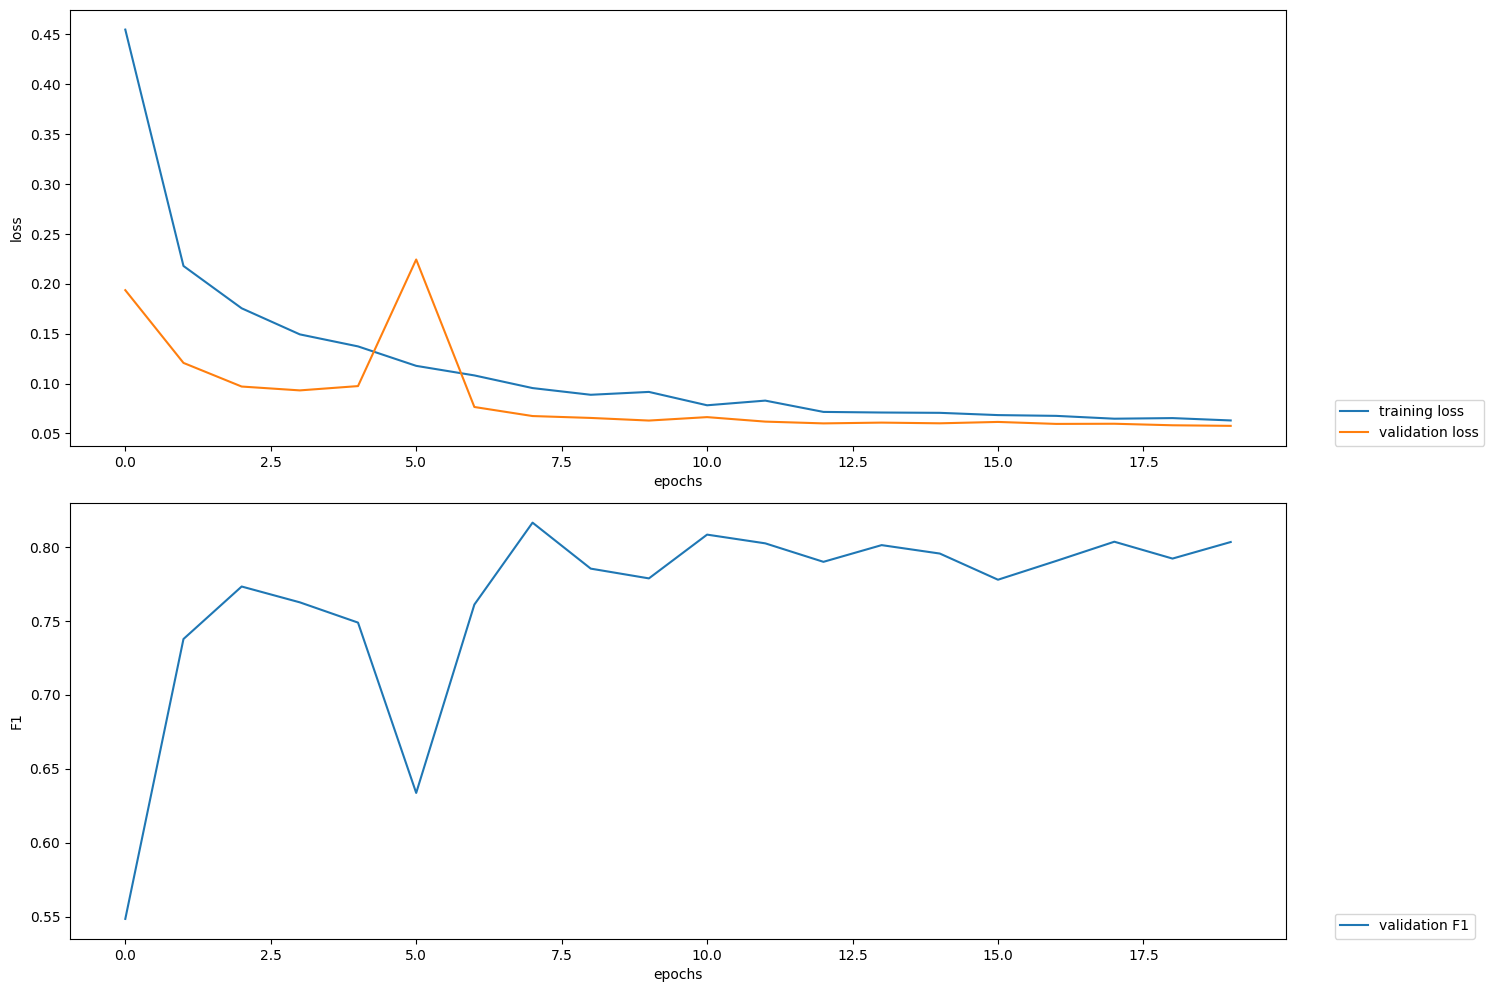

2024-01-22 16:23:27,445 Weights plots are saved in /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/Flair-FR/Flair-ECHR-train-FR/Flair-Hug-model-FR-all/weights.png


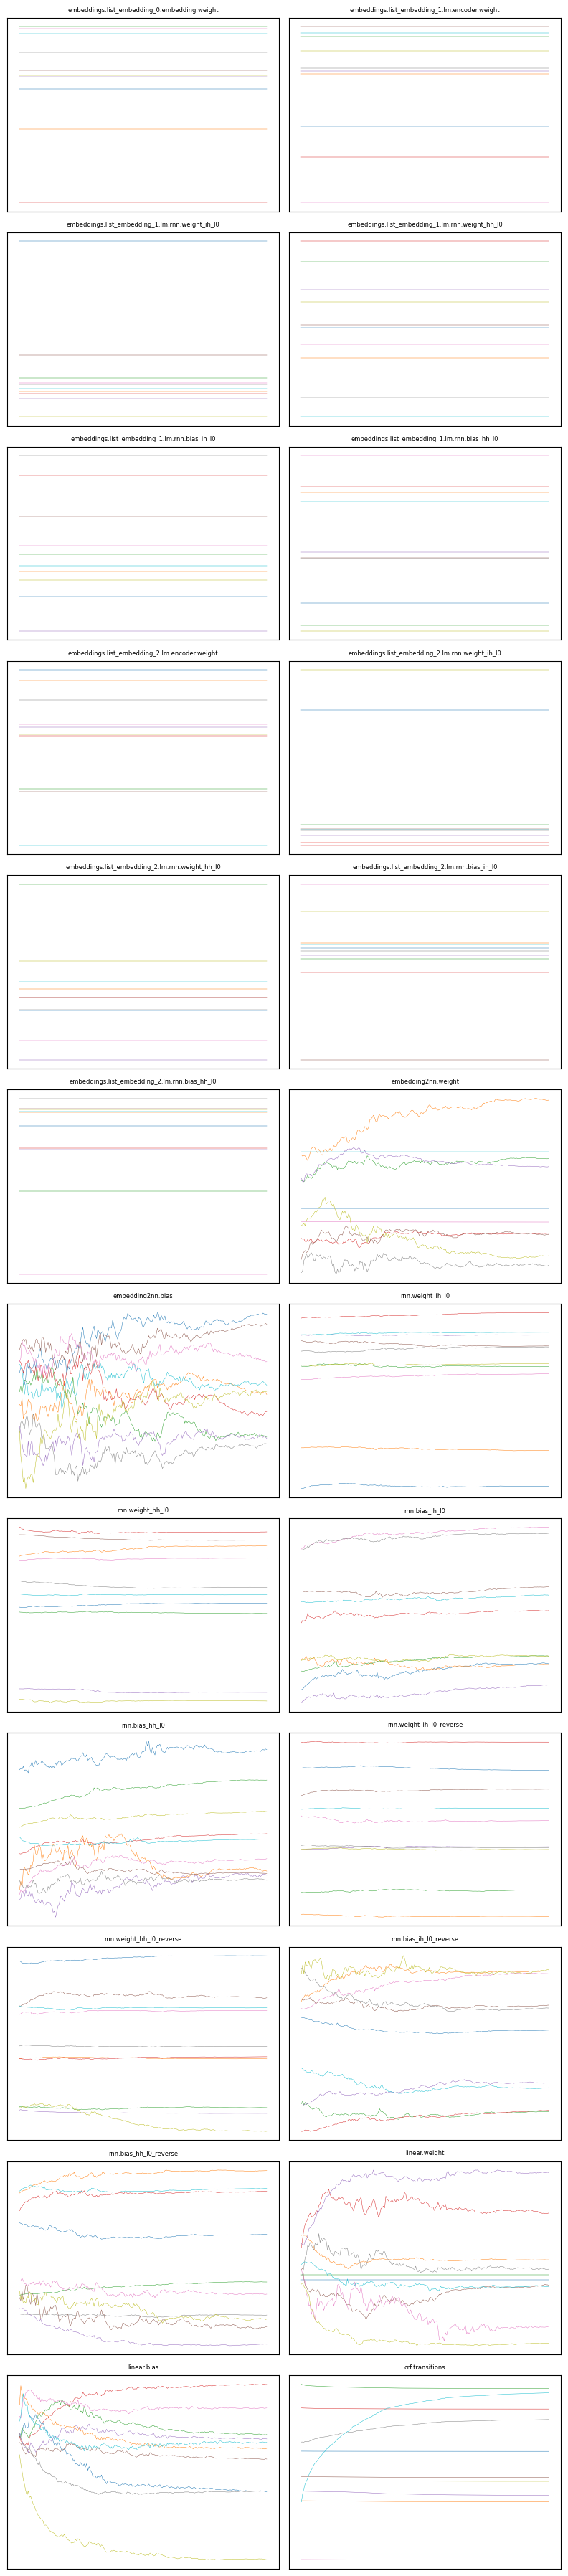

In [ ]:
# plot training loss and weights
# Check documentation on training models with Flair

from flair.visual.training_curves import Plotter

plotter = Plotter()
plotter.plot_training_curves('/content/drive/MyDrive/.../loss.tsv')
plotter.plot_weights('/content/drive/MyDrive/.../weights.txt')